In [1]:
import torch
from torchvision import models as md, datasets, transforms
from models import TrainConfig, ClTrainer
import wandb

## A Training Pipeline
This notebook contains a simple training pipeline.<br/>
We use wandb to log progress.

In [2]:
wandb.login()

wandb: Currently logged in as: oliverweissl. Use `wandb login --relogin` to force relogin


True

###  Create Datasets
Please note that most models work on RGB images!

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)
# Lets make the train and validation split.
train_ds = datasets.SVHN("./train_data", split="train", transform=transform, download=False)
val_ds = datasets.SVHN("./val_data", split="test", transform=transform, download=False)

In [4]:
conf = TrainConfig(
    lr=1e-5,  # The learning rate to start with.
    max_lr=1e-2,  # The maximal learning rate for the scheduler.
    batch=64,
    epochs=5,
    model="WideResNet50_2",
    dataset="SVHN",
)

trainer = ClTrainer(
    train_dataset=train_ds,
    val_dataset=val_ds,
    model=md.wide_resnet50_2(),
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.AdamW,
    scheduler=torch.optim.lr_scheduler.OneCycleLR,
    train_config=conf,
    out_features=10,  # Make sure to adapt this according to your data!!
)

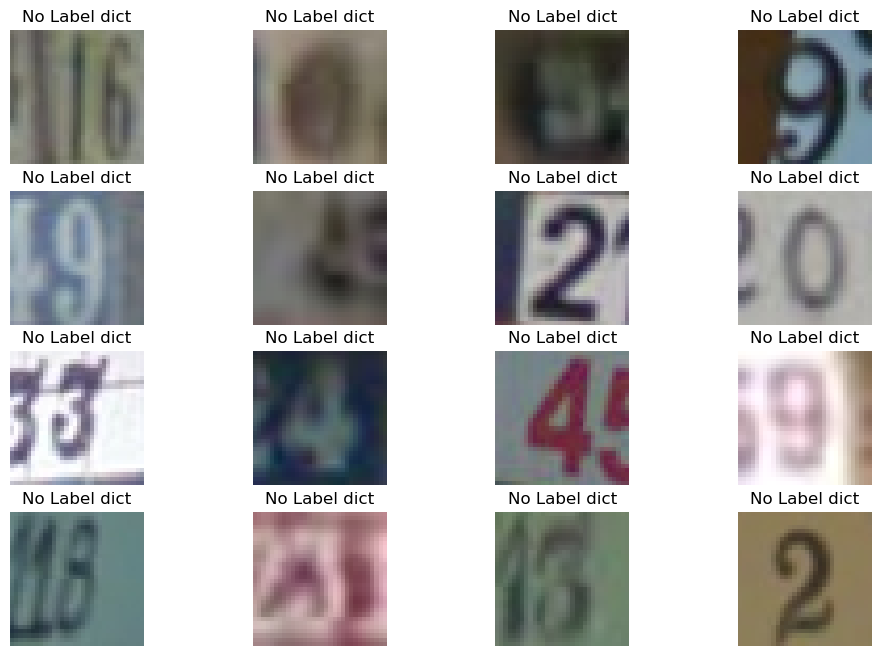

In [5]:
trainer.show_samples()

In [6]:
trainer.train()

100%|██████████| 5/5 [01:56<00:00, 23.33s/it]


In [9]:
trainer.save_model("../../models/wrn_svhn.pkl")